In [7]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('heart_disease.csv')

df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [9]:
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [10]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [11]:
df['cholesterol'].value_counts()

cholesterol
0      172
254     16
211     13
204     13
234     13
      ... 
316      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [12]:
df['resting bp s'].value_counts()

resting bp s
120    166
130    149
140    137
110     76
150     73
      ... 
0        1
185      1
96       1
127      1
164      1
Name: count, Length: 67, dtype: int64

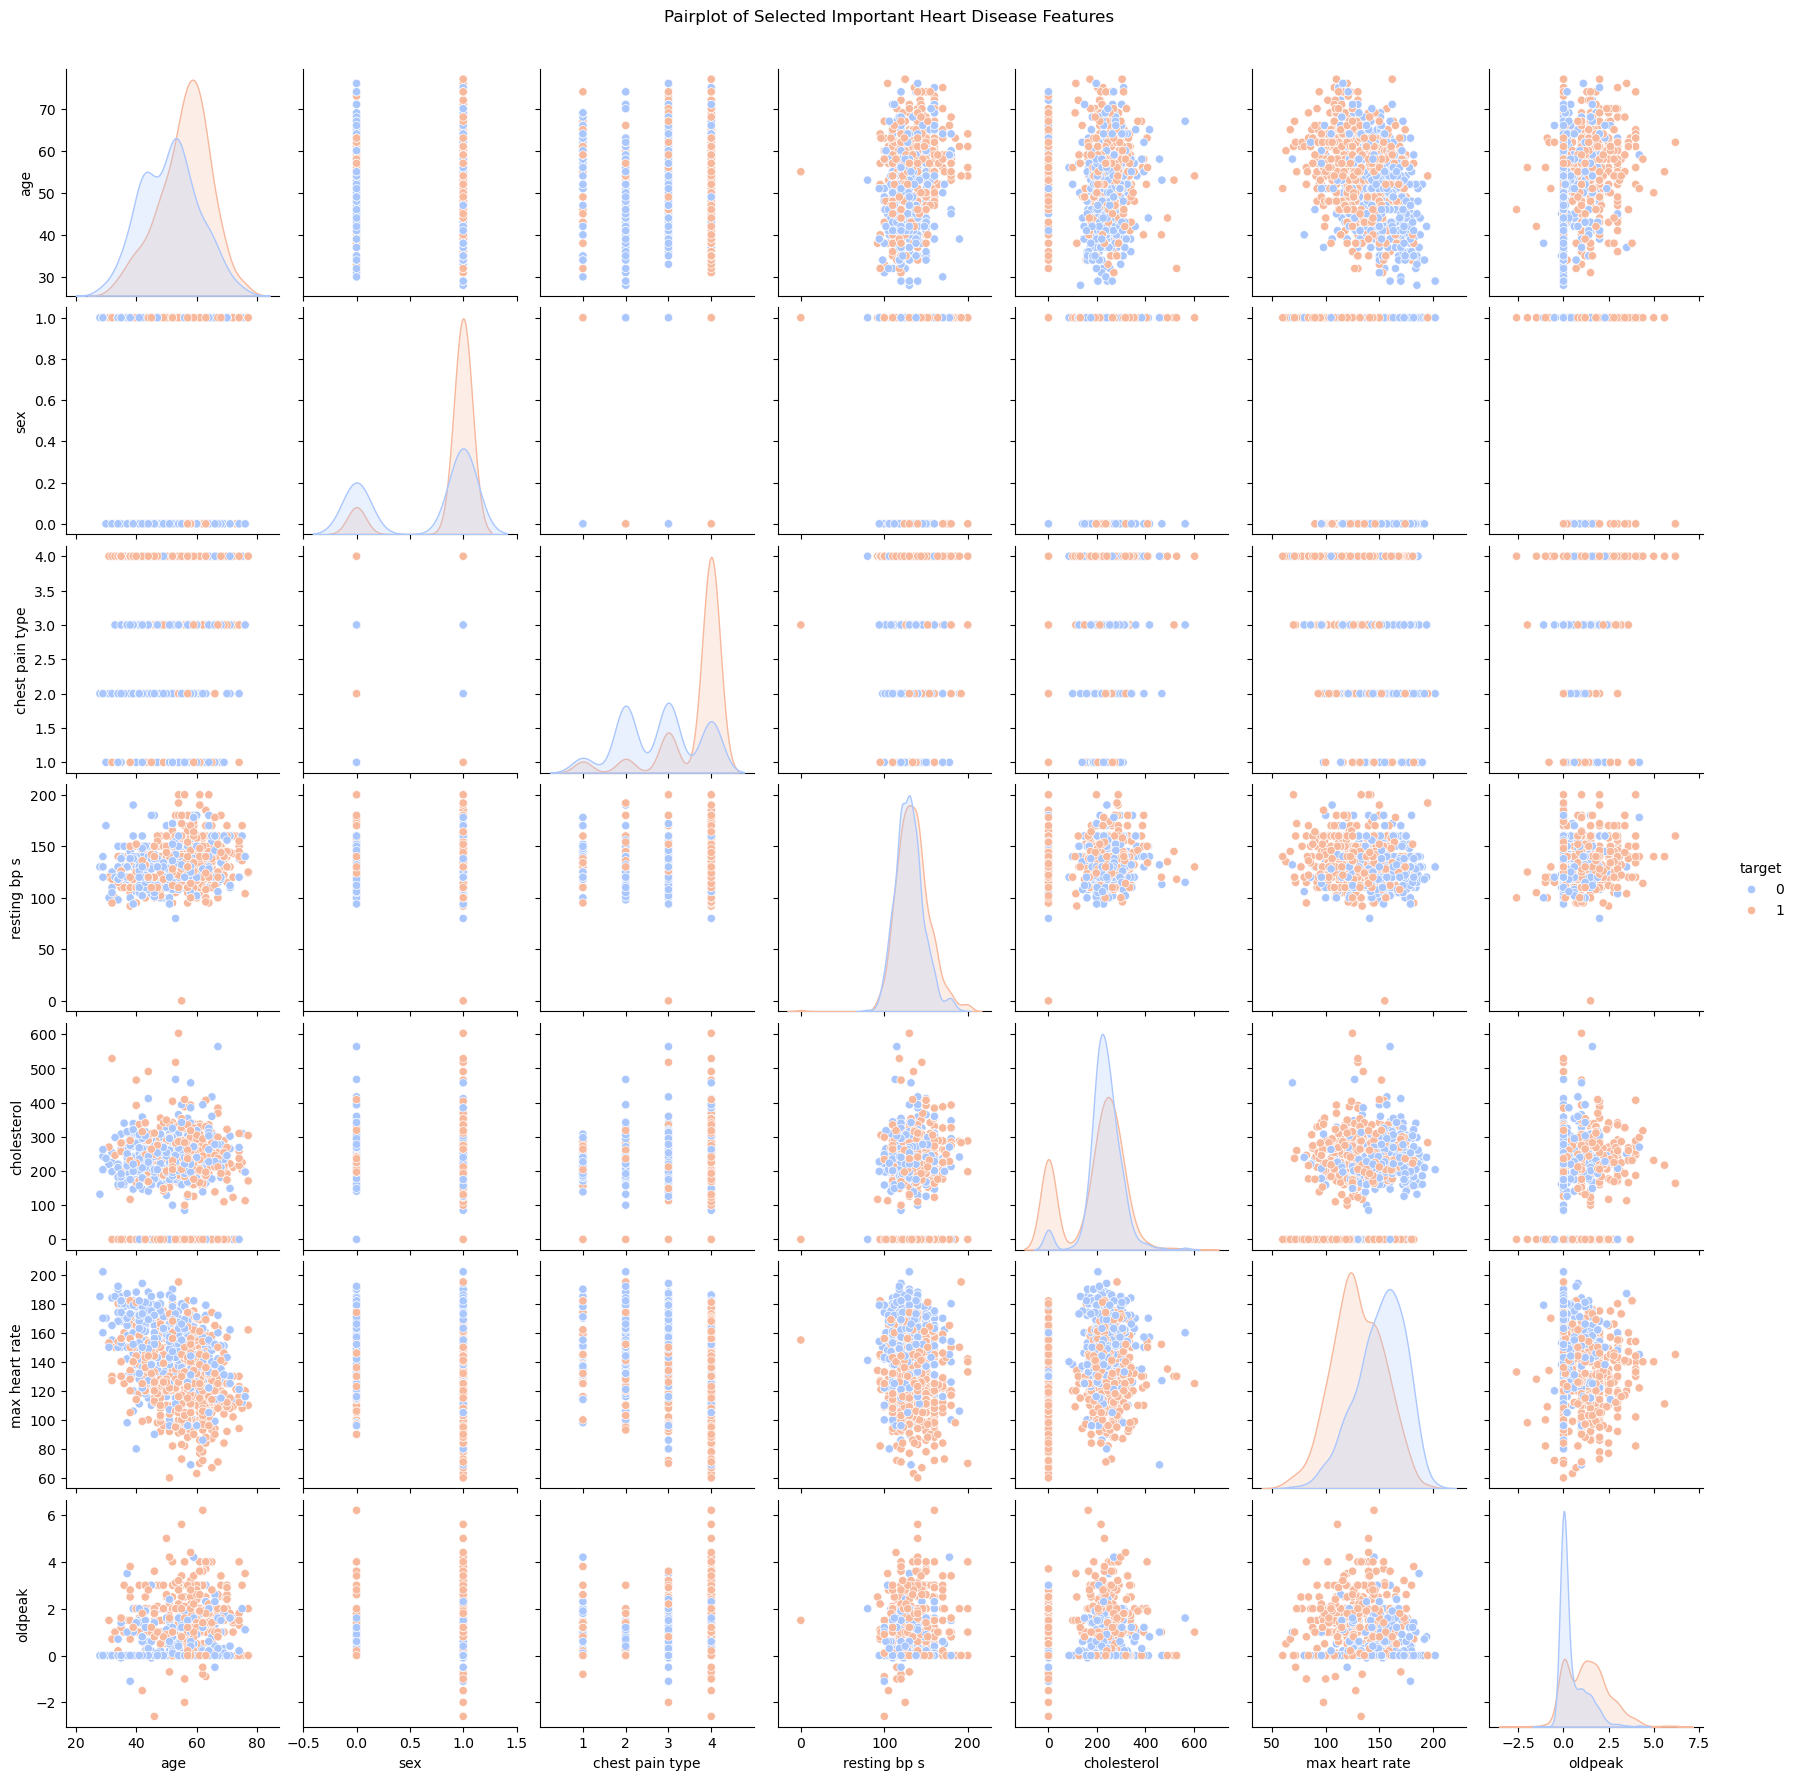

In [13]:

columns= [
    "age", "sex", "chest pain type", "resting bp s",
    "cholesterol", "max heart rate", "oldpeak", "target"
]

sns.pairplot(df[columns], hue="target", palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of Selected Important Heart Disease Features", y=1.02)
plt.show()

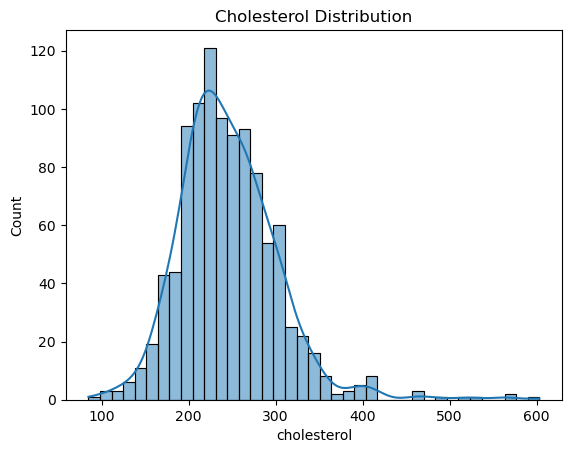

In [14]:
df["cholesterol"] = df["cholesterol"].replace(0, np.nan)
sns.histplot(df["cholesterol"], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

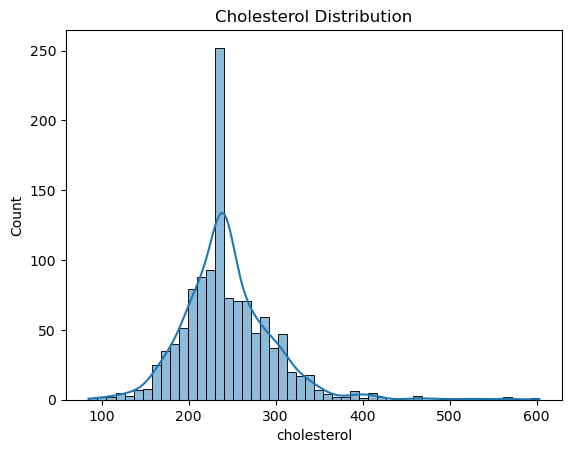

In [15]:

df["cholesterol"] = df["cholesterol"].fillna(df["cholesterol"].median())
     

sns.histplot(df["cholesterol"], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

<Axes: >

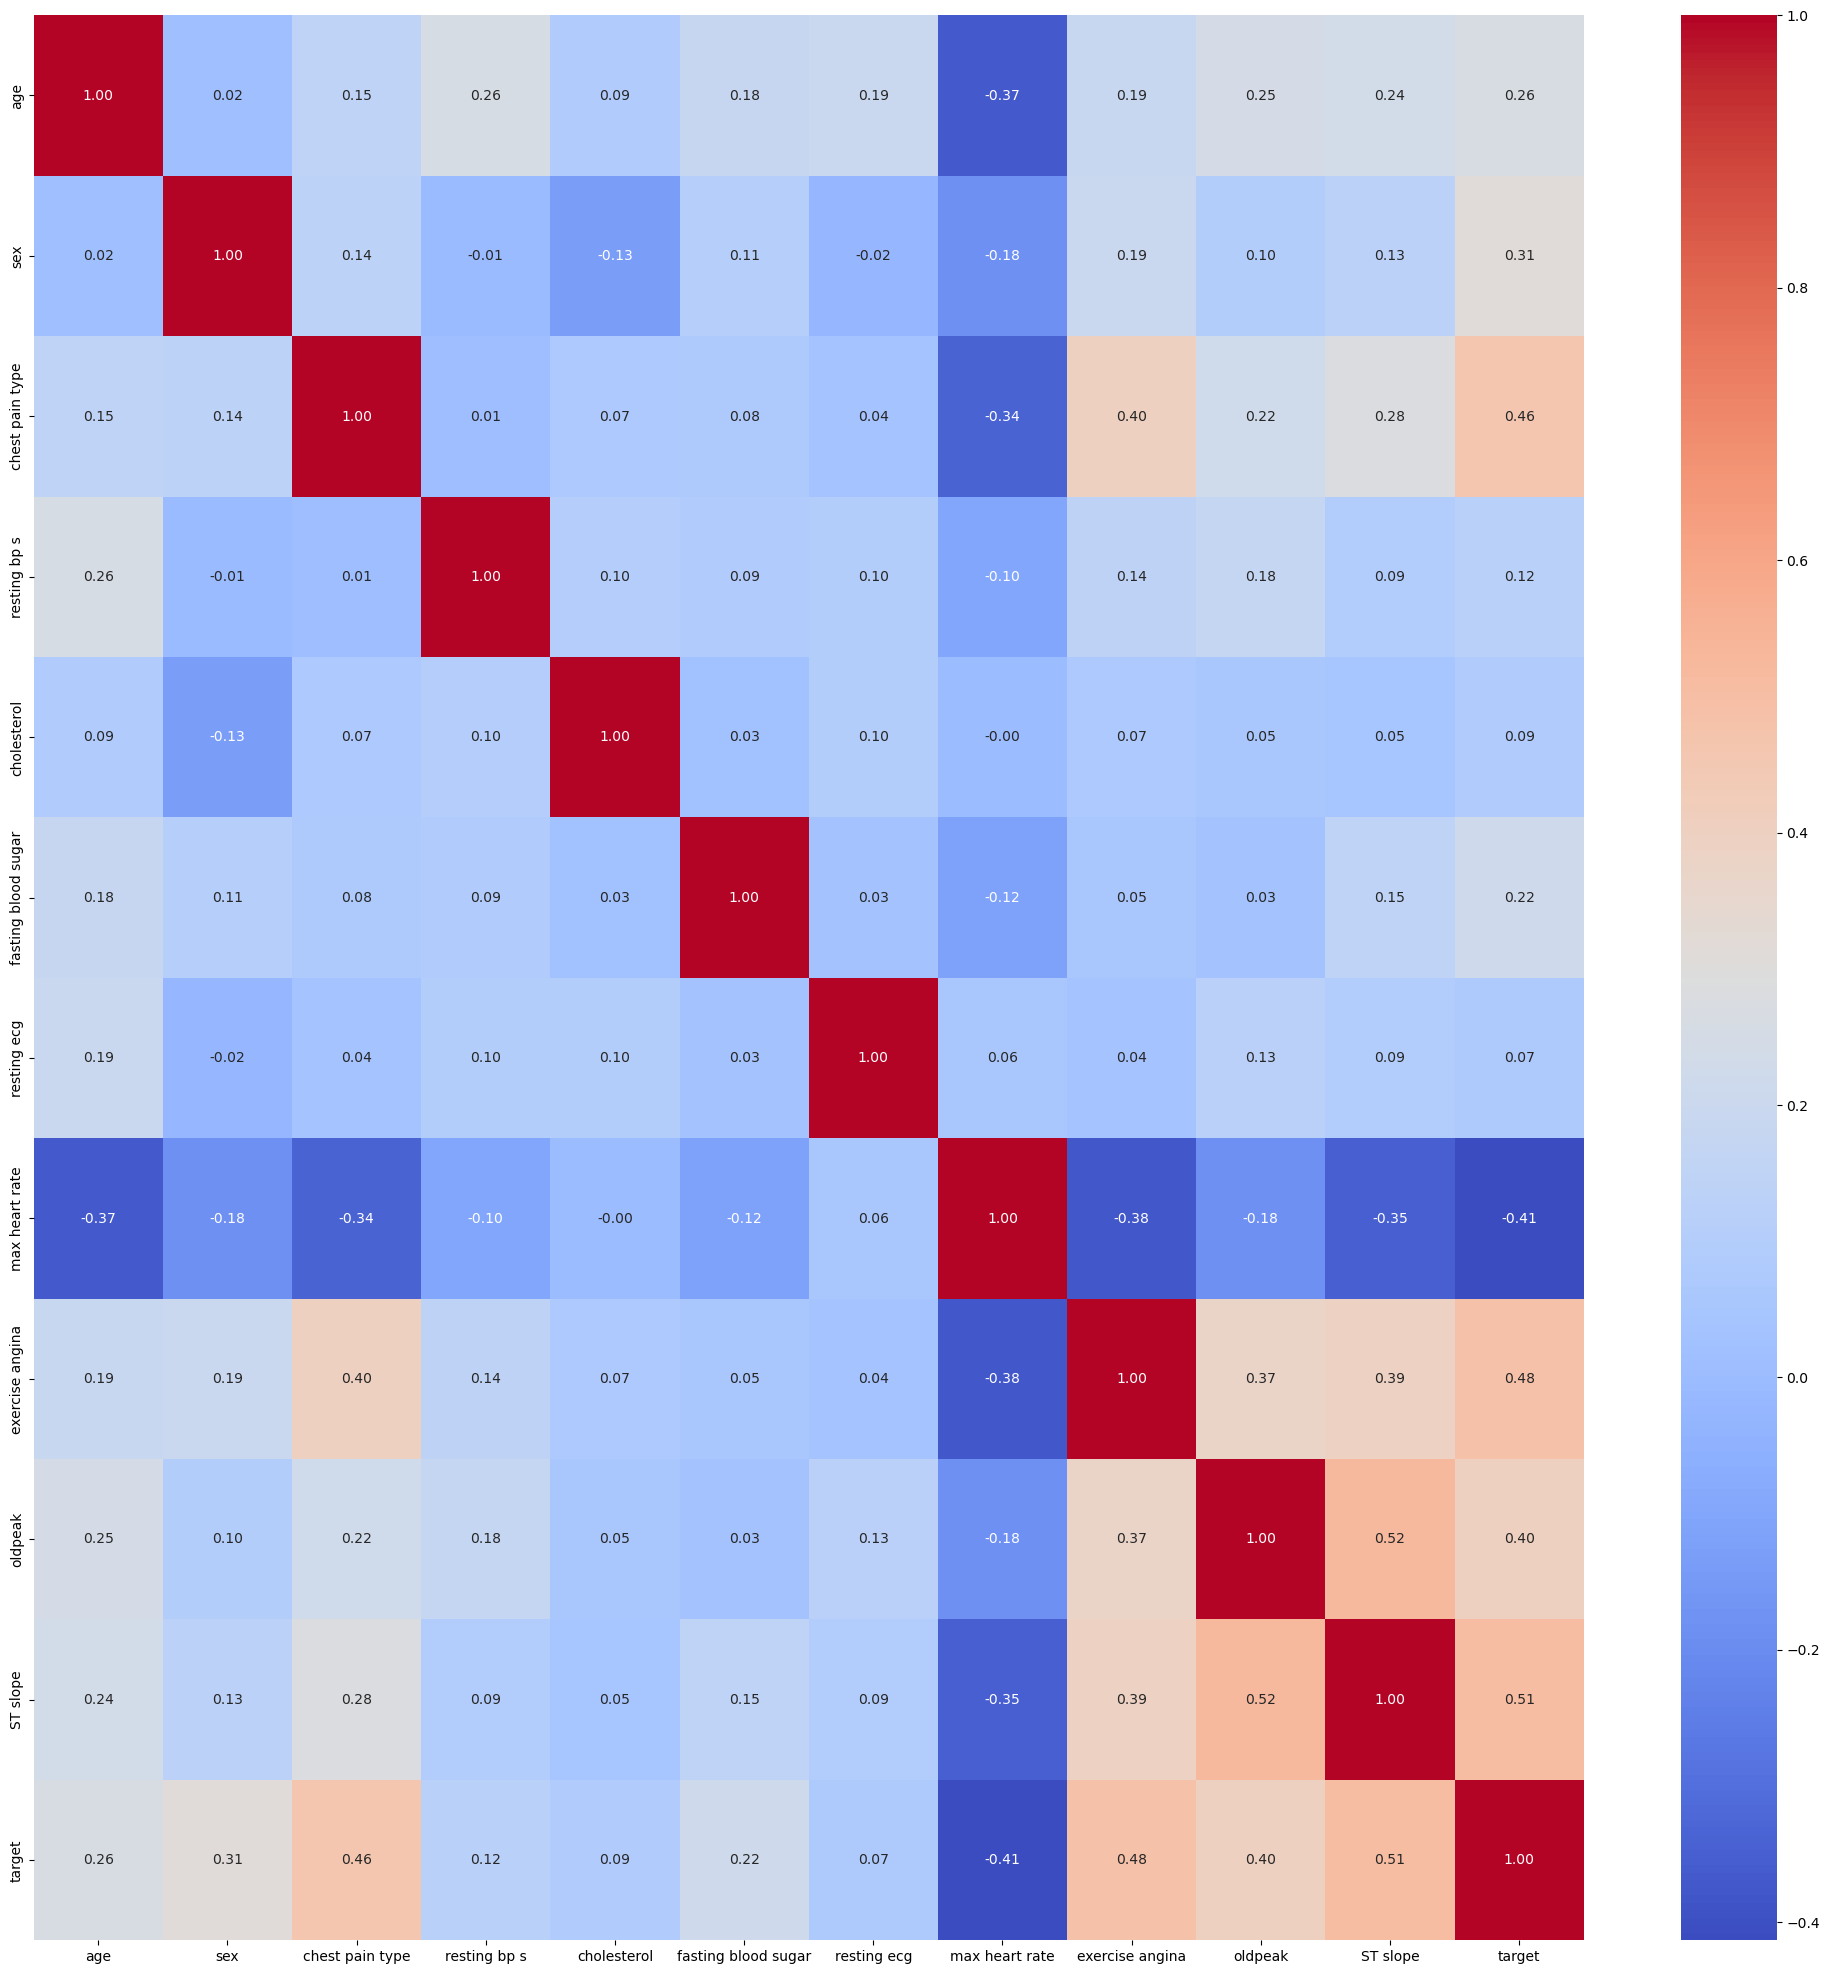

In [16]:

corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [17]:
X = df.drop('target', axis=1)
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289.0,0,0,172,0,0.0,1
1,49,0,3,160,180.0,0,0,156,0,1.0,2
2,37,1,2,130,283.0,0,1,98,0,0.0,1
3,48,0,4,138,214.0,0,0,108,1,1.5,2
4,54,1,3,150,195.0,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264.0,0,0,132,0,1.2,2
1186,68,1,4,144,193.0,1,0,141,0,3.4,2
1187,57,1,4,130,131.0,0,0,115,1,1.2,2
1188,57,0,2,130,236.0,0,2,174,0,0.0,2


In [18]:
y=df['target']
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((833, 11), (357, 11), (833,), (357,))

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled

(array([[-1.56610611,  0.57503993,  0.81505412, ..., -0.76791579,
          0.28849695,  0.64841466],
        [ 0.87789707, -1.73900966,  0.81505412, ..., -0.76791579,
          4.89405387,  2.29014539],
        [ 0.77163606,  0.57503993,  0.81505412, ...,  1.30222612,
          1.02538606,  2.29014539],
        ...,
        [ 0.77163606,  0.57503993, -2.33304517, ..., -0.76791579,
          1.57805289,  0.64841466],
        [ 0.87789707, -1.73900966,  0.81505412, ..., -0.76791579,
          2.49916427,  2.29014539],
        [-1.24732309,  0.57503993, -1.28367874, ..., -0.76791579,
         -0.81683671, -0.99331607]]),
 array([[ 0.77163606,  0.57503993,  0.81505412, ..., -0.76791579,
          0.10427467,  0.64841466],
        [ 0.027809  ,  0.57503993, -0.23431231, ...,  1.30222612,
          0.56483037,  0.64841466],
        [ 0.13407001, -1.73900966, -1.28367874, ..., -0.76791579,
         -0.81683671, -0.99331607],
        ...,
        [ 1.72798513,  0.57503993,  0.81505412, ...,  

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, min_samples_leaf=3, min_samples_split=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, random_state=42)

In [22]:
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
     

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       107
           1       0.90      0.96      0.93       131

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



In [23]:

rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, min_samples_leaf=3, min_samples_split=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3, random_state=42)

In [24]:
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
     

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       107
           1       0.91      0.96      0.94       131

    accuracy                           0.93       238
   macro avg       0.93      0.92      0.93       238
weighted avg       0.93      0.93      0.93       238



In [25]:
!pip install xgboost

In [26]:
!pip3 install catboost

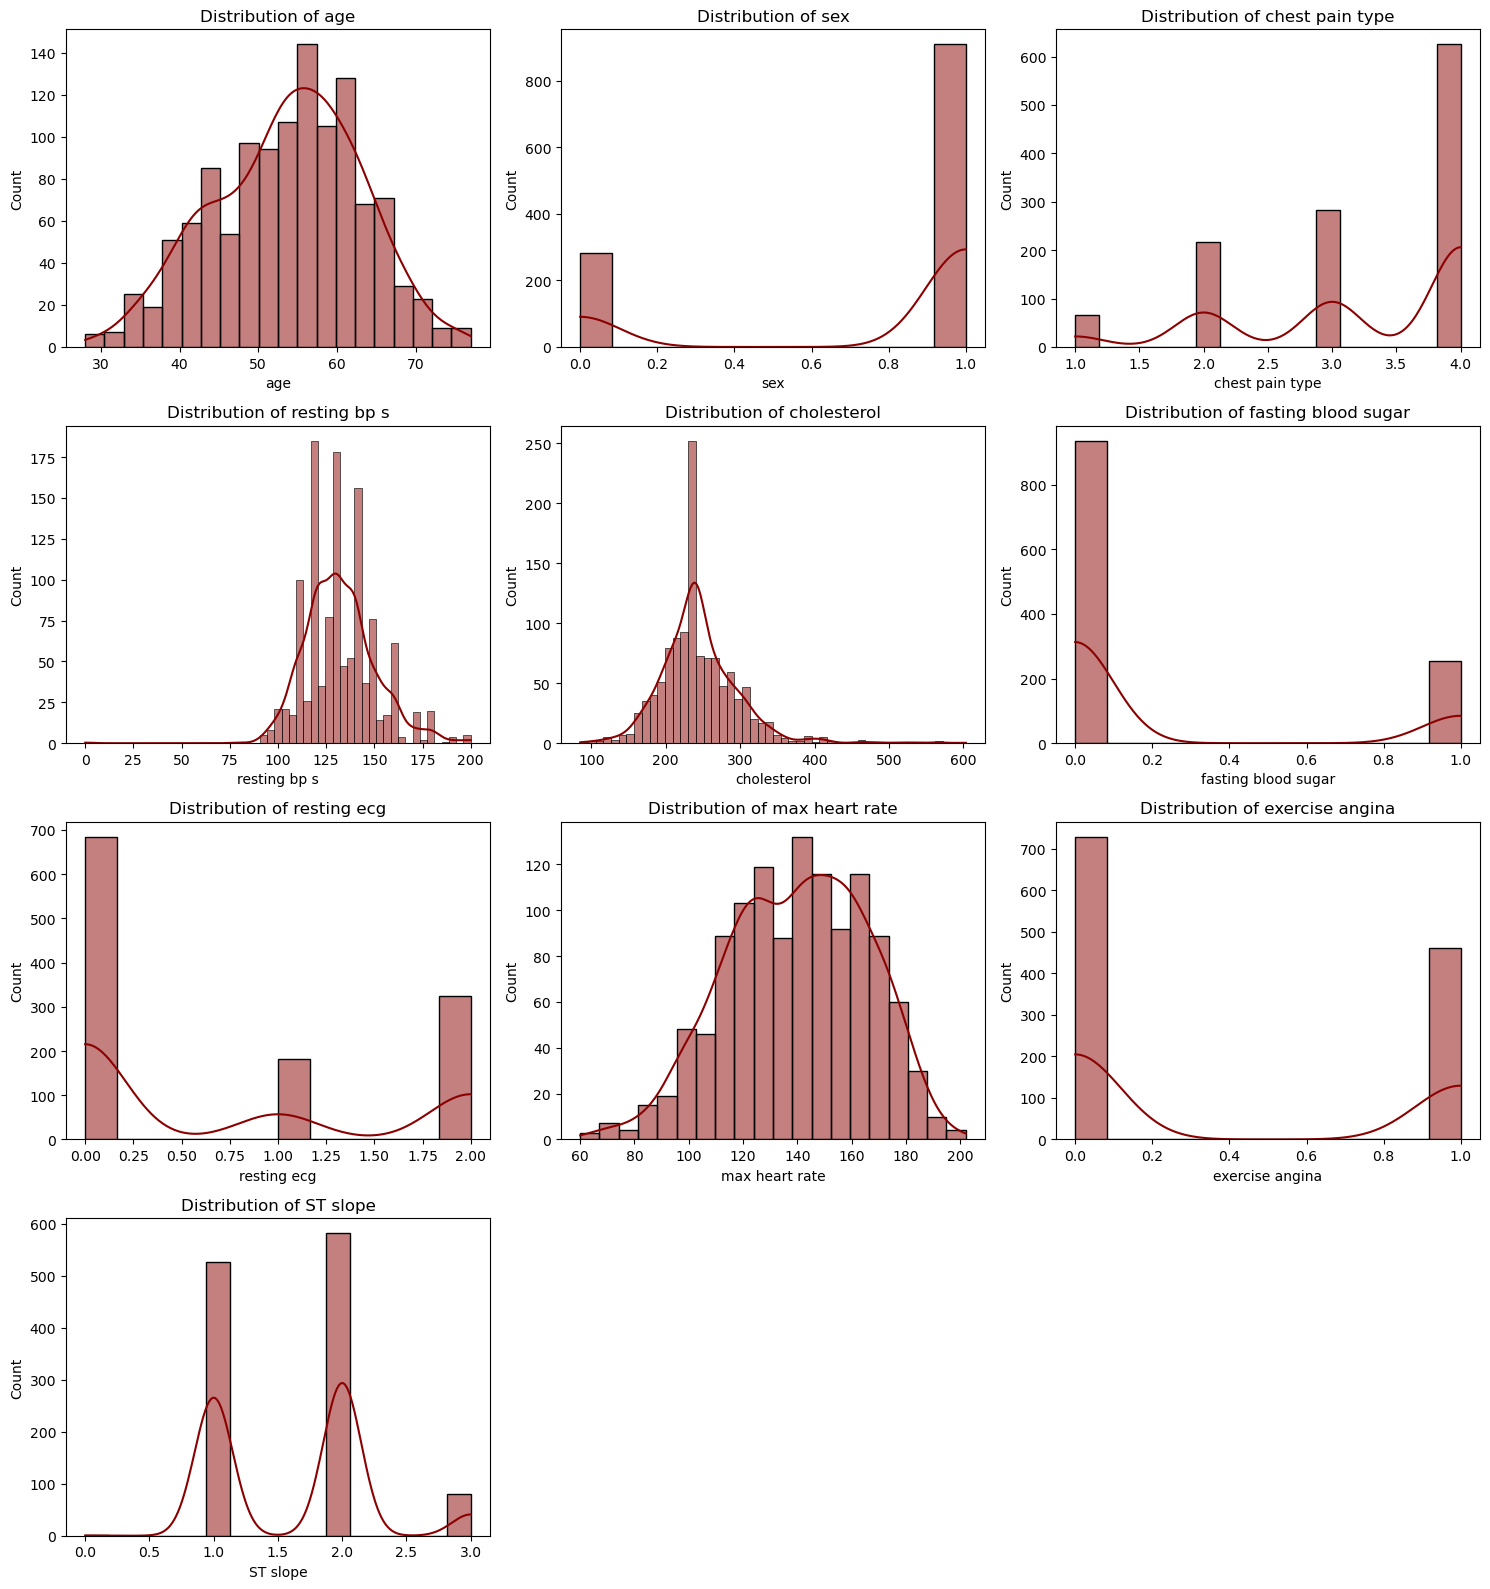

In [27]:
df = df.drop(columns=['oldpeak'])
     

cols = [col for col in df.columns if col != 'target']

num_features = len(cols)
cols_per_row = 3
rows = (num_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col].dropna(), kde=True, color='darkred')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

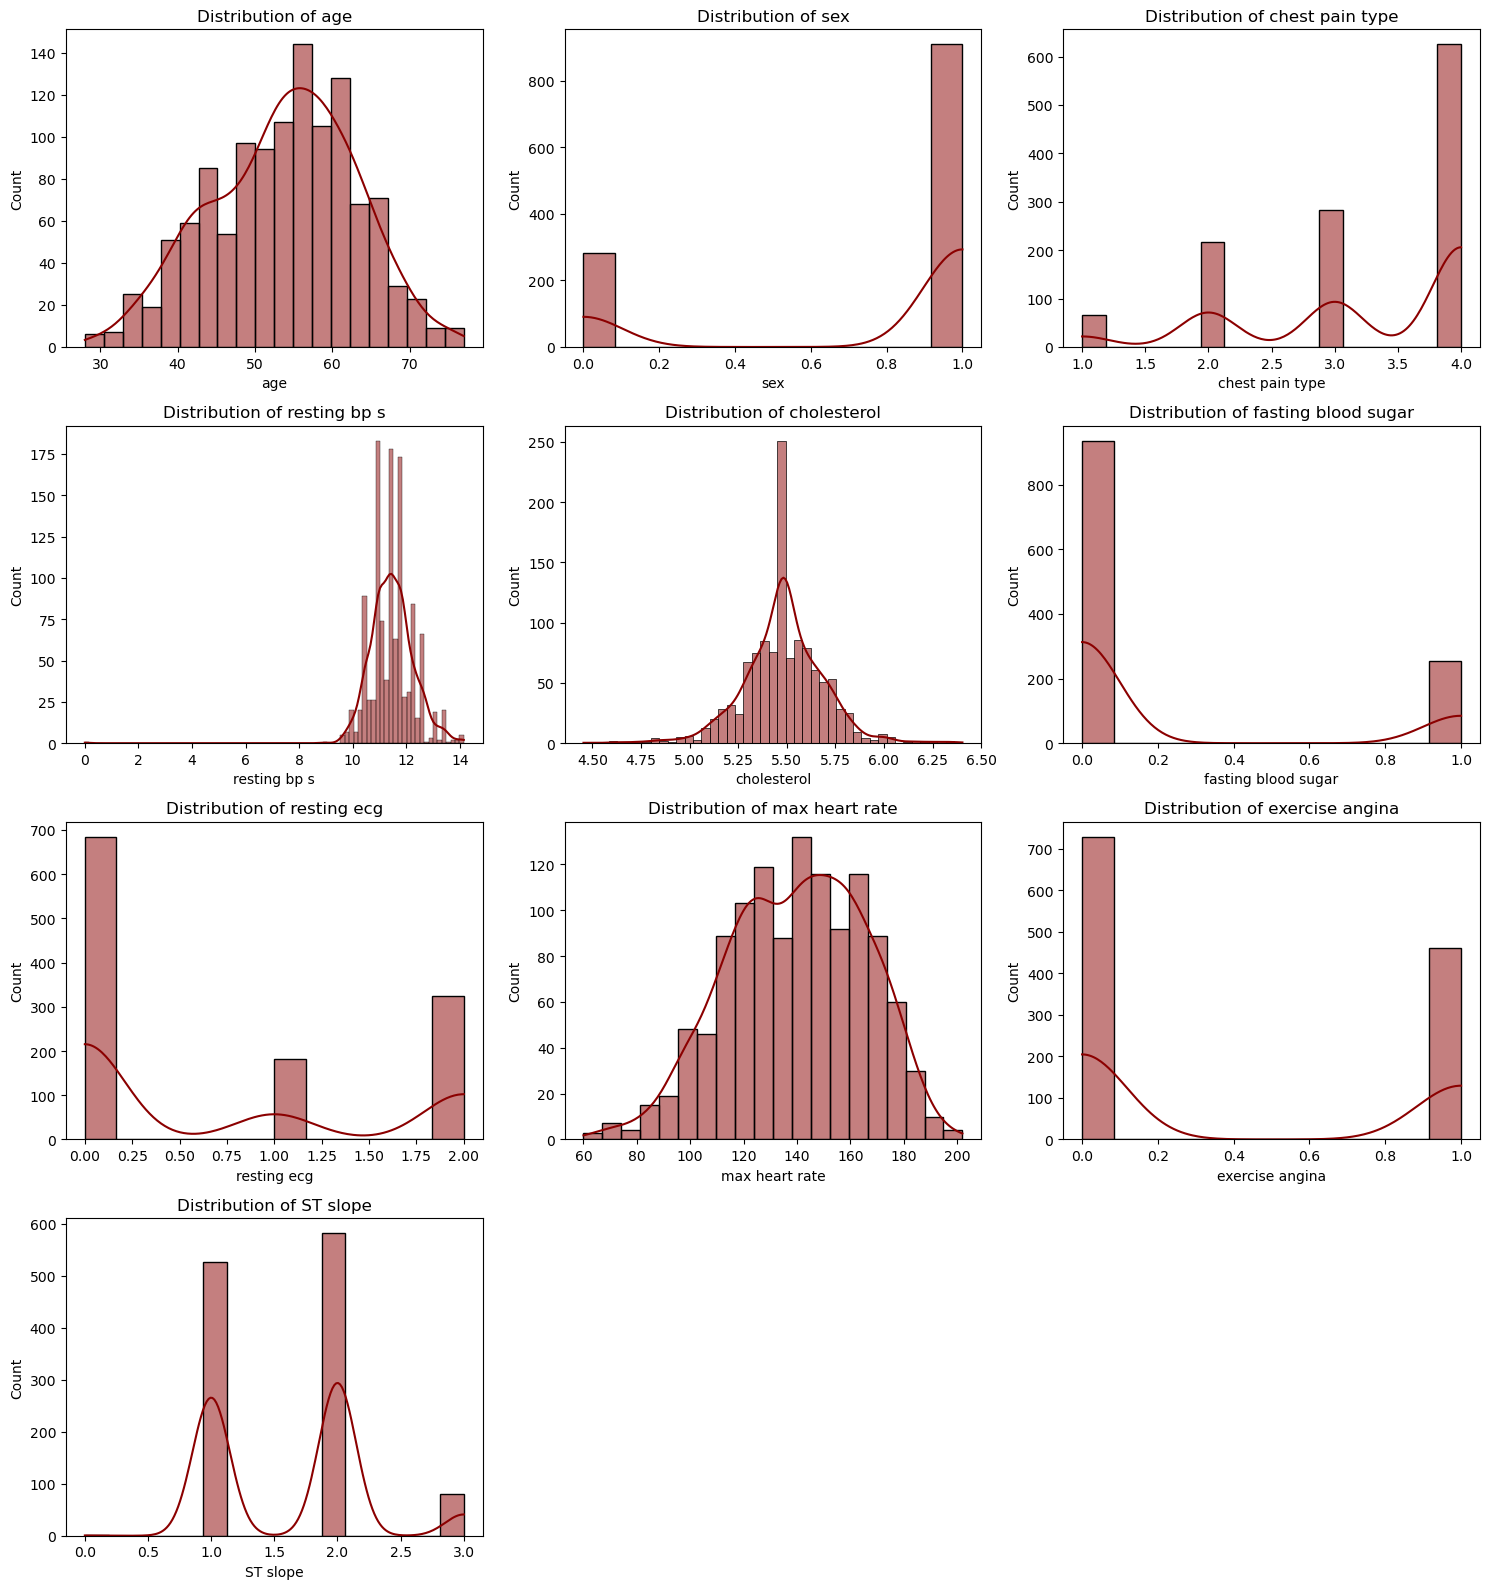

In [28]:
df['cholesterol'] = np.log1p(df['cholesterol'])
df['resting bp s'] = np.sqrt(df['resting bp s'])

     

cols = [col for col in df.columns if col != 'target']

num_features = len(cols)
cols_per_row = 3
rows = (num_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col].dropna(), kde=True, color='darkred')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [29]:
X = df.drop('target', axis=1)
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,ST slope
0,40,1,2,11.832160,5.669881,0,0,172,0,1
1,49,0,3,12.649111,5.198497,0,0,156,0,2
2,37,1,2,11.401754,5.648974,0,1,98,0,1
3,48,0,4,11.747340,5.370638,0,0,108,1,2
4,54,1,3,12.247449,5.278115,0,0,122,0,1
...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,10.488088,5.579730,0,0,132,0,2
1186,68,1,4,12.000000,5.267858,1,0,141,0,2
1187,57,1,4,11.401754,4.882802,0,0,115,1,2
1188,57,0,2,11.401754,5.468060,0,2,174,0,2


In [30]:
y=df['target']
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [31]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
     

((833, 10), (357, 10), (833,), (357,))

In [32]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled


(array([[-1.56610611,  0.57503993,  0.81505412, ..., -0.02428744,
         -0.76791579,  0.64841466],
        [ 0.87789707, -1.73900966,  0.81505412, ...,  0.17682032,
         -0.76791579,  2.29014539],
        [ 0.77163606,  0.57503993,  0.81505412, ..., -1.31137713,
          1.30222612,  2.29014539],
        ...,
        [ 0.77163606,  0.57503993, -2.33304517, ...,  0.17682032,
         -0.76791579,  0.64841466],
        [ 0.87789707, -1.73900966,  0.81505412, ...,  0.78014361,
         -0.76791579,  2.29014539],
        [-1.24732309,  0.57503993, -1.28367874, ...,  0.86058672,
         -0.76791579, -0.99331607]]),
 array([[ 0.77163606,  0.57503993,  0.81505412, ...,  0.17682032,
         -0.76791579,  0.64841466],
        [ 0.027809  ,  0.57503993, -0.23431231, ...,  0.37792808,
          1.30222612,  0.64841466],
        [ 0.13407001, -1.73900966, -1.28367874, ...,  0.57903585,
         -0.76791579, -0.99331607],
        ...,
        [ 1.72798513,  0.57503993,  0.81505412, ..., -

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, min_samples_leaf=3, min_samples_split=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3, random_state=42)

In [35]:

y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       107
           1       0.91      0.94      0.92       131

    accuracy                           0.92       238
   macro avg       0.92      0.91      0.91       238
weighted avg       0.92      0.92      0.92       238



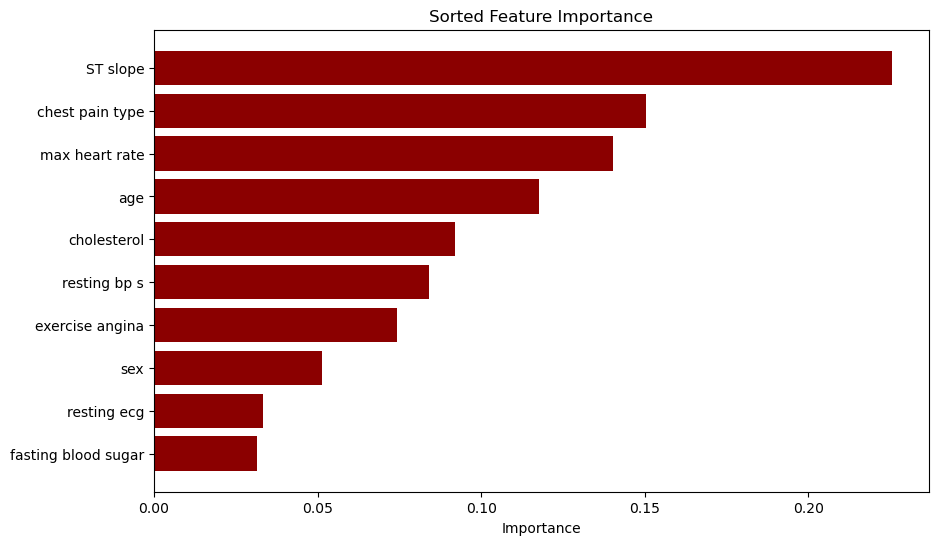

In [36]:

features = X.columns.tolist()
features_importance = rf_model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': features_importance
})

feat_imp = feat_imp.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='darkred')
plt.xlabel('Importance')
plt.title('Sorted Feature Importance')
plt.show()

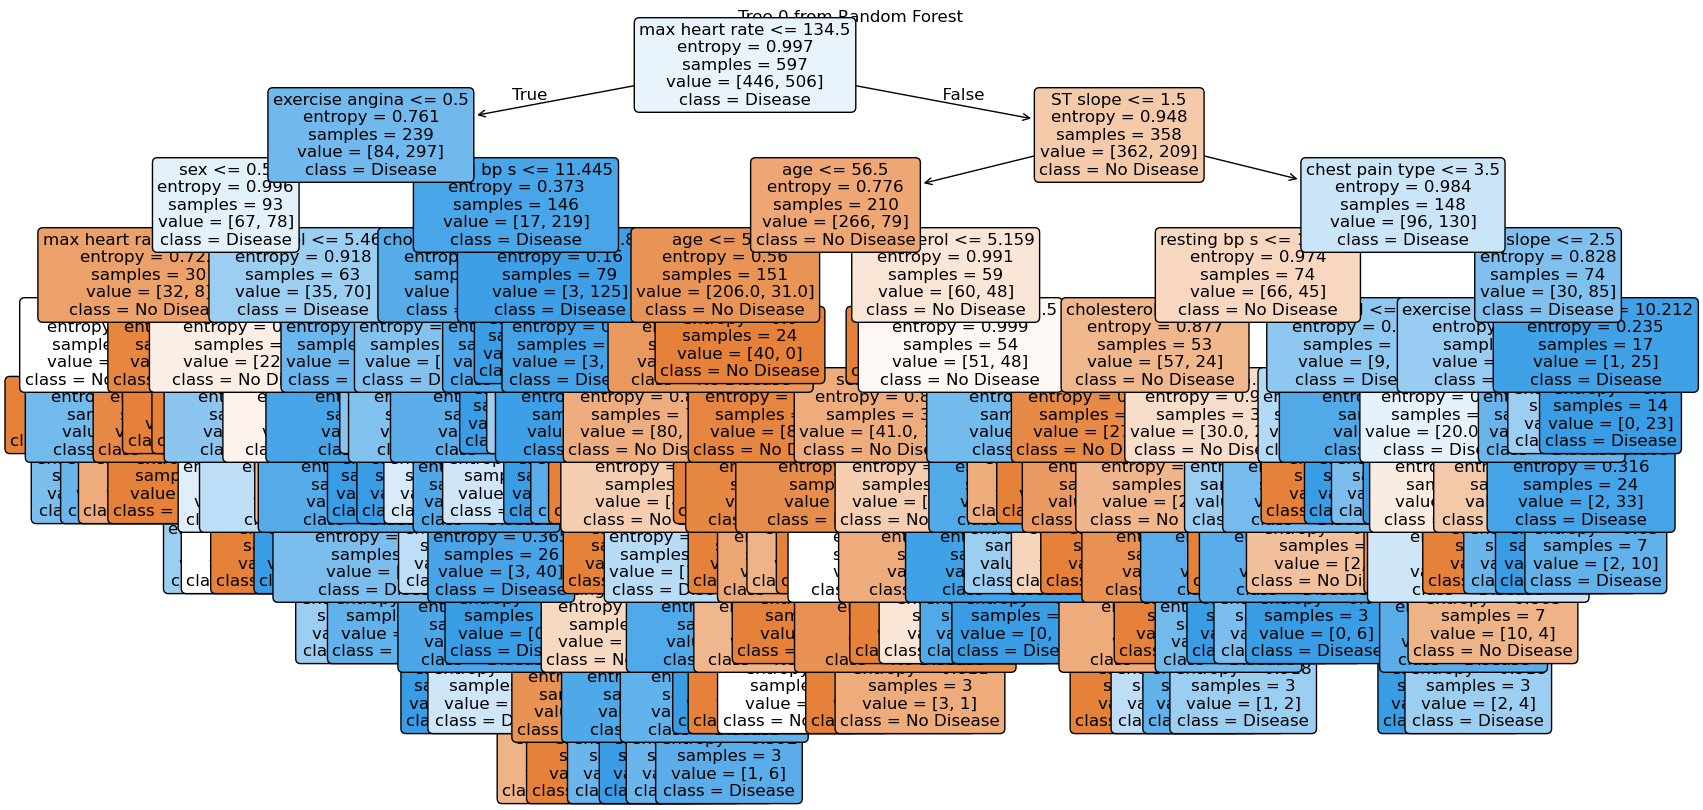

In [37]:

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=X.columns,
          class_names=["No Disease", "Disease"],
          filled=True, rounded=True, fontsize=12)
plt.title("Tree 0 from Random Forest")
plt.show()

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ada_model = AdaBoostClassifier(
    estimator=rf_model,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[100   7]
 [  7 124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.95      0.95      0.95       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238


Accuracy Score: 0.9411764705882353


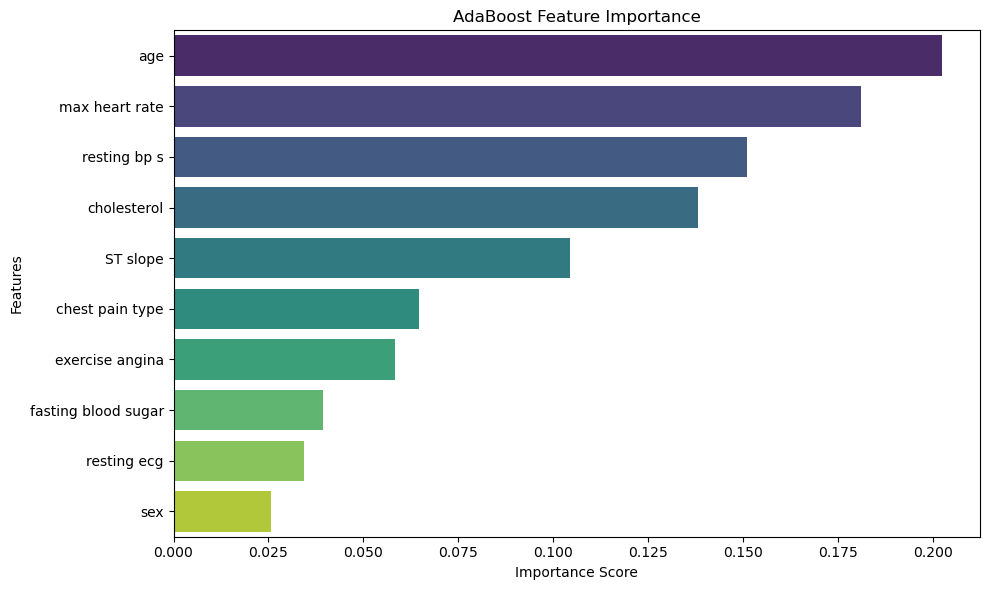

In [39]:
feature_imp = pd.Series(ada_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("AdaBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


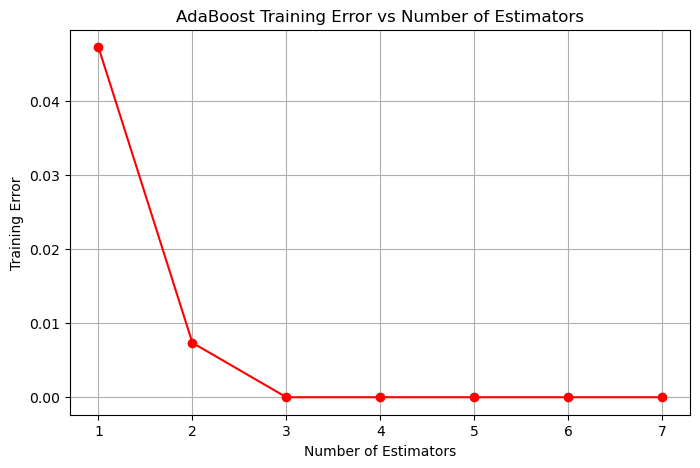

In [40]:
from sklearn.metrics import zero_one_loss

errors = []
for y_pred in ada_model.staged_predict(X_train):
    errors.append(zero_one_loss(y_train, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1, len(errors)+1), errors, marker='o', color='red')
plt.title('AdaBoost Training Error vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Error')
plt.grid(True)
plt.show()

In [41]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.3,
    reg_lambda=1,
    subsample=1,
    colsample_bytree=1,
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 99   8]
 [  8 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.94      0.94      0.94       131

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238


Accuracy Score: 0.9327731092436975


c:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:26:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


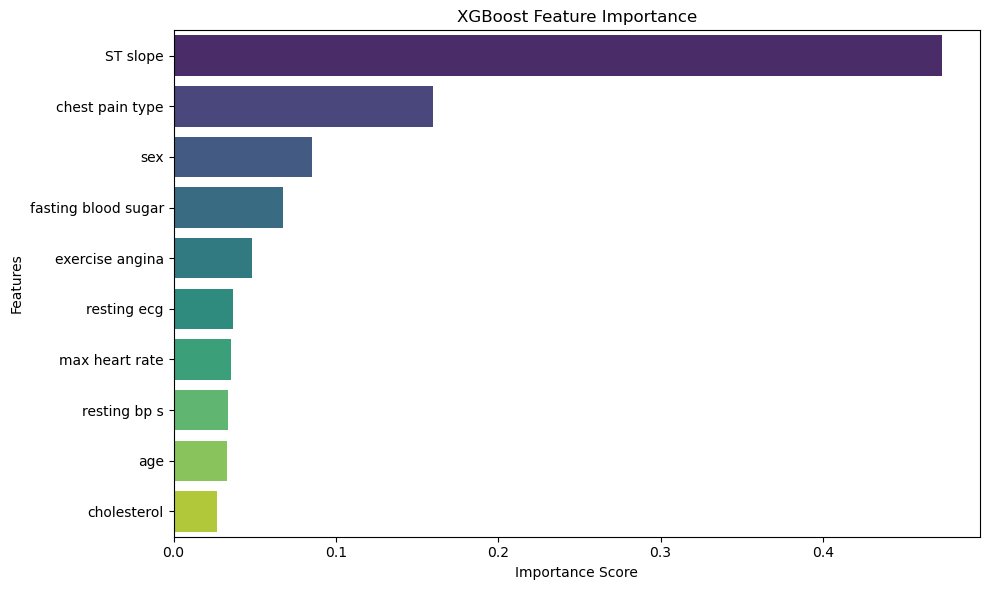

In [42]:

feature_imp = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [43]:

from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    eval_metric='Logloss',
    random_seed=42,
    verbose=100
)
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

0:	learn: 0.6705438	total: 69.5ms	remaining: 1m 9s
100:	learn: 0.2533451	total: 354ms	remaining: 3.15s
200:	learn: 0.1923643	total: 698ms	remaining: 2.78s
300:	learn: 0.1538954	total: 938ms	remaining: 2.18s
400:	learn: 0.1230503	total: 1.16s	remaining: 1.73s
500:	learn: 0.0964861	total: 1.37s	remaining: 1.36s
600:	learn: 0.0782197	total: 1.6s	remaining: 1.06s
700:	learn: 0.0643798	total: 1.82s	remaining: 776ms
800:	learn: 0.0526035	total: 2.02s	remaining: 503ms
900:	learn: 0.0450195	total: 2.23s	remaining: 245ms
999:	learn: 0.0381287	total: 2.5s	remaining: 0us
Confusion Matrix:
 [[100   7]
 [  7 124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.95      0.95      0.95       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238


Accuracy Score: 0.9411764705882353


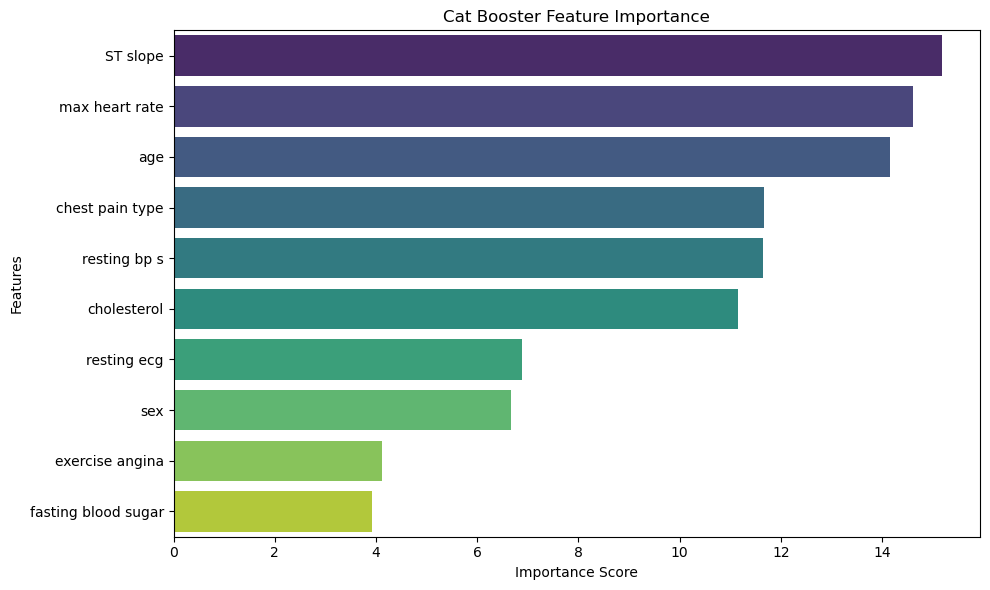

In [44]:

feature_imp = pd.Series(cat_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("Cat Booster Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [45]:
import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_lambda=0.0,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 498, number of negative: 454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523109 -> initscore=0.092503
[LightGBM] [Info] Start training from score 0.092503
Confusion Matrix:
 [[ 99   8]
 [  7 124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.94      0.95      0.94       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.9

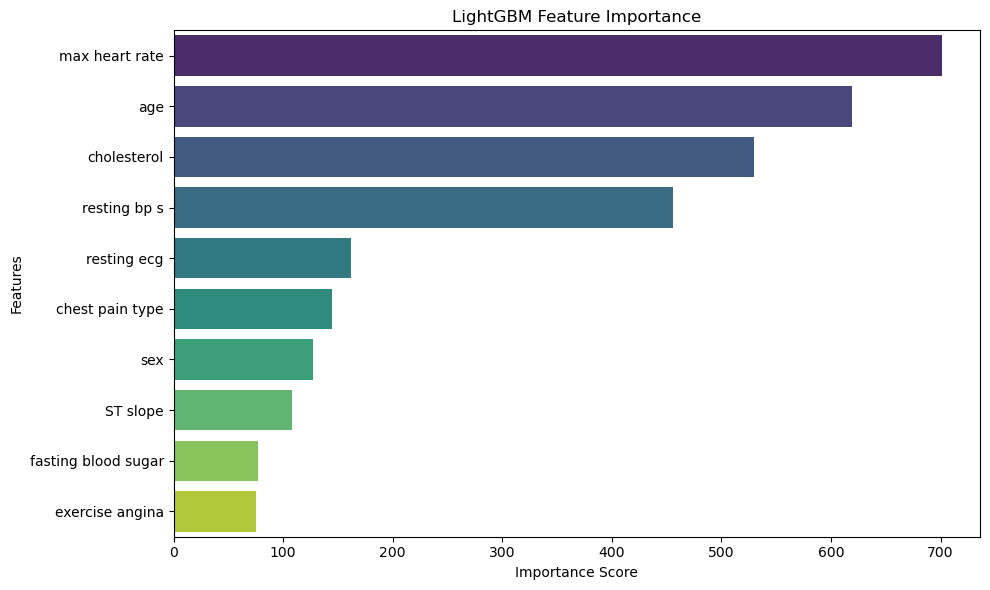

In [46]:

feature_imp = pd.Series(lgbm_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()